# Coach Lab: Linear Regression Practice

### Imports

In [ ]:
# Most basic imports - we'll need more!
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Goal

We have a dataset which captures details about homes sold in King County, Seattle. The goal is to predict Sale Price based on the features of the house.

Data source: https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
df = pd.read_csv("kc_house_data.csv", parse_dates=[1])

### Explore Our Data

In [ ]:
df.head()

In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
# Warning! this takes at least a full minute to run with the full df
# Also it's tiny
sns.pairplot(df)

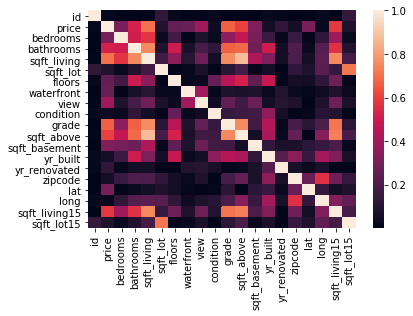

In [34]:
# Check correlation more closely?
sns.heatmap(df.corr().abs())

### Explore Our Target

In [13]:
target = 'price'
df[target].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

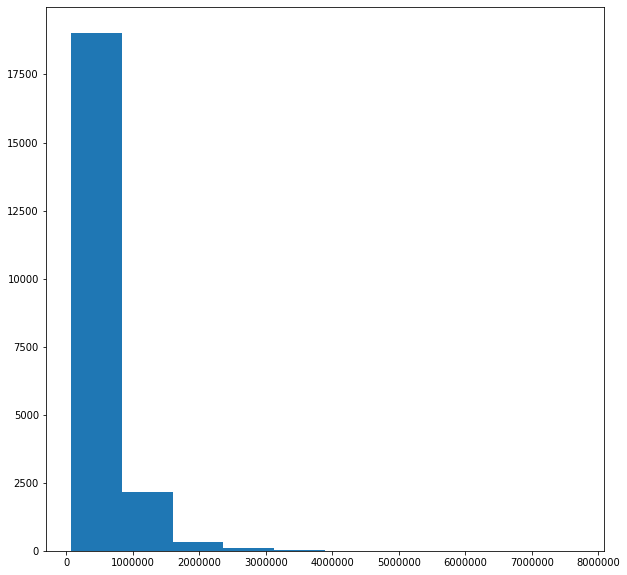

In [14]:
plt.figure(figsize=(10,10))
plt.hist(df[target])

### Naive Model

Also known as a baseline! Or, as I like to call it, the first stupid simple model.

In [15]:
y = df[target]

In [16]:
len(y)

21613

In [17]:
y.mean()

540088.1417665294

In [18]:
y_naive = [y.mean()] * len(y)

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y, y_naive)

0.0

### Full Model

Using all independent variables / features / non-target columns

In [22]:
x_cols_v2 = [col for col in df.columns.to_list() if col not in ['id','date','price']]

In [23]:
x=df[x_cols_v2]

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = lr.predict(x)

In [29]:
r2_score(y,y_pred)

0.6997471890109161

In [30]:
lr.score(x,y)

0.6997471890109161

#### Visual Evaluation

In [31]:
# Setting our residuals
resid = y - y_pred

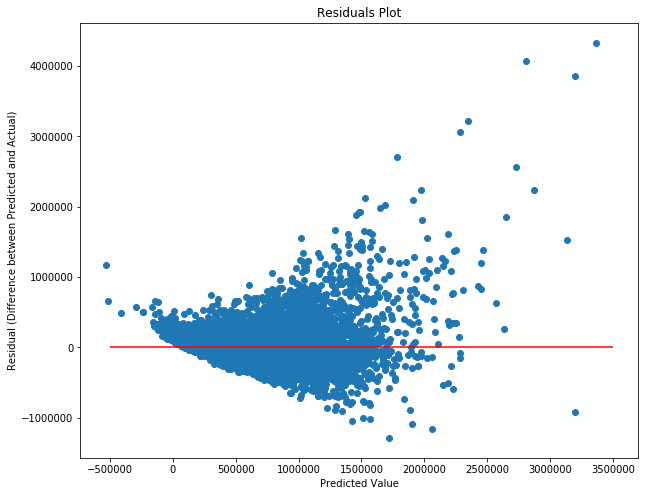

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x=y_pred, y=resid)
plt.hlines(0, xmin=-500000, xmax=3500000, colors='red')

plt.title("Residuals Plot")
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Difference between Predicted and Actual)")

plt.show()

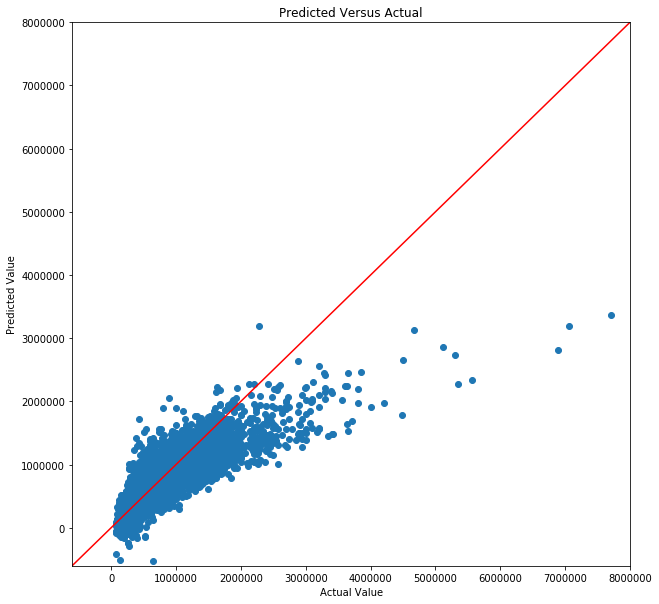

In [33]:
plt.figure(figsize=(10,10))
plt.axis([-600000, 8000000, -600000, 8000000]) # making plot square
plt.scatter(y, y_pred)
plt.plot([-600000, 8000000], [-600000, 8000000], 'red') #add a line

plt.title("Predicted Versus Actual")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")

plt.show()

### Now what?

ideas:

- check assumptions
- narrow down number of columns
- visualize residuals